In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
company_data['ShelveLoc'] = company_data['ShelveLoc'].astype('category')
company_data['Urban'] = company_data['Urban'].astype('category')
company_data['US'] = company_data['US'].astype('category')

In [6]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
print(company_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


In [8]:
company_data.describe(include = 'all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [9]:
company_data['High'] = company_data['Sales'].map(lambda x: 1 if x>8 else 0)
company_data['ShelveLoc'] = company_data['ShelveLoc'].cat.codes
company_data['Urban'] = company_data['Urban'].cat.codes
company_data['US'] = company_data['US'].cat.codes
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [10]:
X = company_data.iloc[:,1:11]
y = company_data['High']
print(X)
print(y)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 10), (80, 10), (320,), (80,))

In [12]:
dt_model = DecisionTreeClassifier()

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid_search = GridSearchCV(estimator = dt_model, param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]} , cv= 5)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [15]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [16]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [17]:
grid_search.best_score_

0.765

In [18]:
dt_model=DecisionTreeClassifier(criterion='entropy' , max_depth=11)

In [19]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

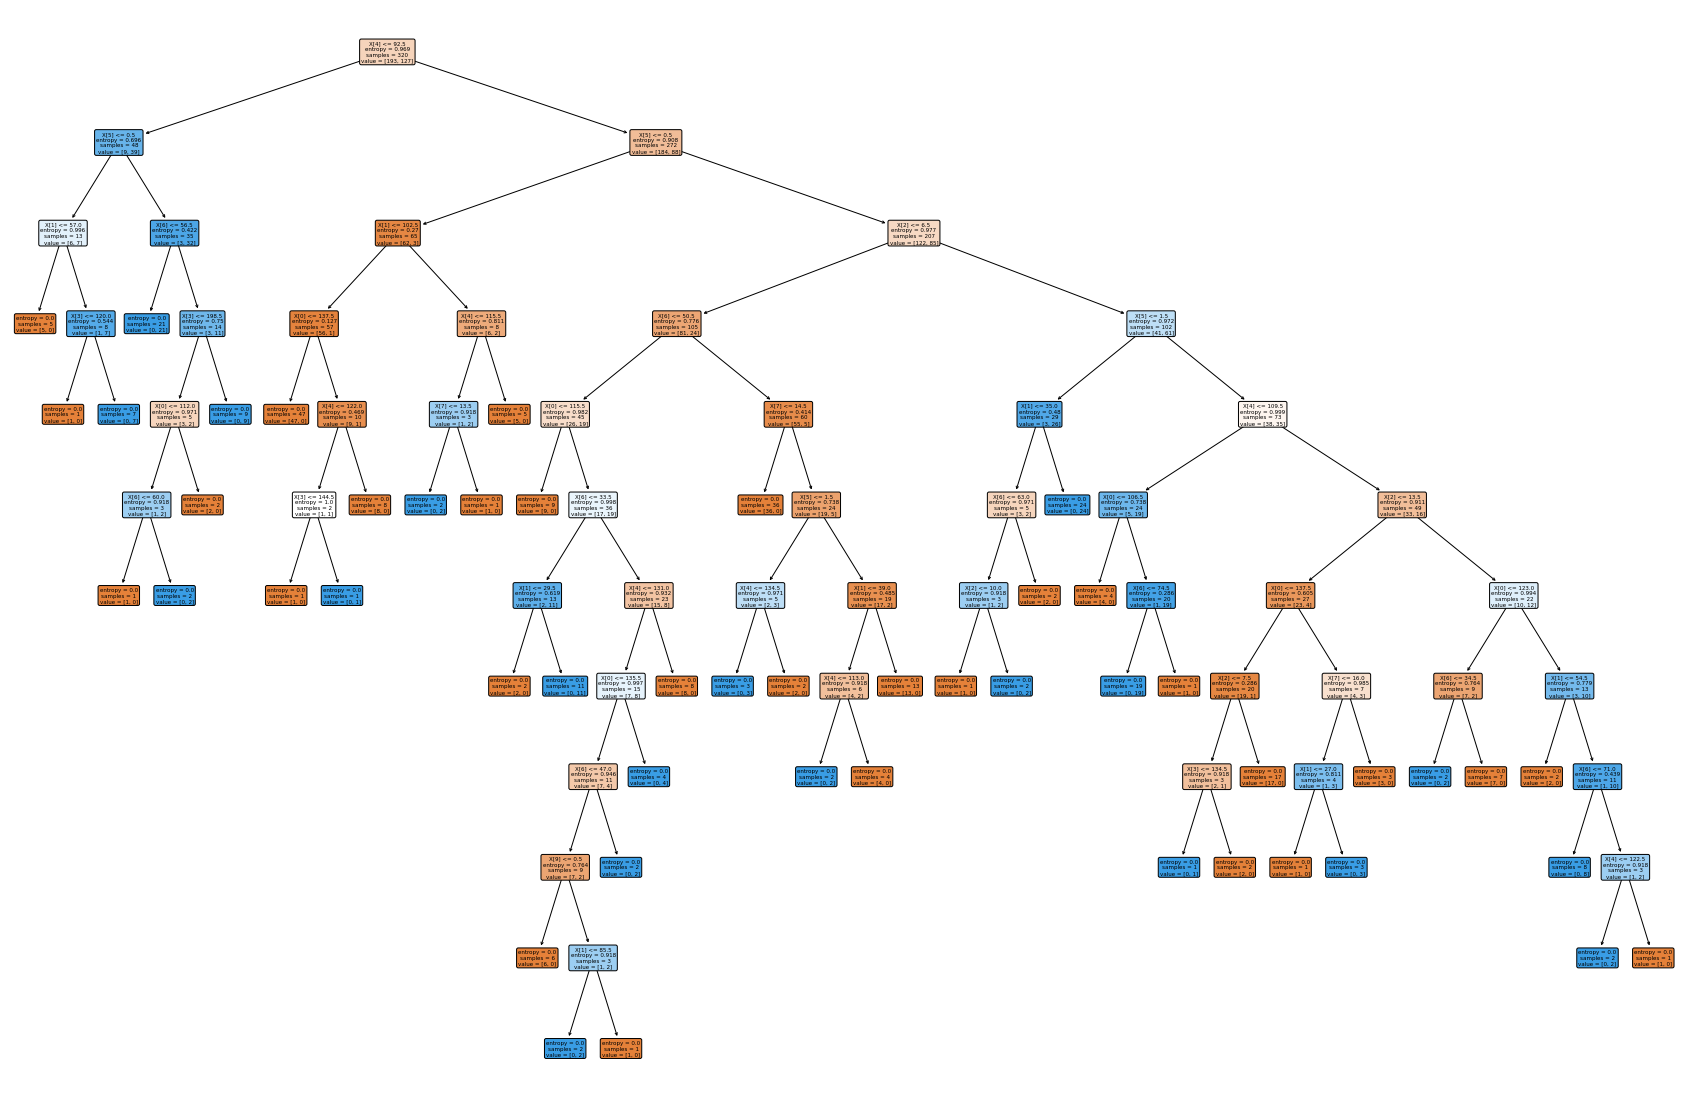

In [21]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize = (30,20))
plot_tree(dt_model, filled = True, rounded = True)
plt.show()

In [22]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [23]:
# Model Evaluation
# Confusion_Matrix => To know the Misclassification done by the model

accuracy_score(y_train,y_pred_train)

1.0

In [24]:
confusion_matrix(y_train, y_pred_train)

array([[193,   0],
       [  0, 127]], dtype=int64)

In [25]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       127

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [26]:
accuracy_score(y_test, y_pred_test)

0.7375

In [27]:
confusion_matrix(y_test,y_pred_test)

array([[36,  7],
       [14, 23]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        43
           1       0.77      0.62      0.69        37

    accuracy                           0.74        80
   macro avg       0.74      0.73      0.73        80
weighted avg       0.74      0.74      0.73        80



In [29]:
# Model Improvement 1

from sklearn.ensemble import AdaBoostClassifier

# Model Builing and Model Training

ad_model = AdaBoostClassifier()
ad_model.fit(X_train,y_train)

AdaBoostClassifier()

In [30]:
# Model Testing

y_pred_train_d1 = ad_model.predict(X_train)
y_pred_test_d1 = ad_model.predict(X_test)

In [31]:
# Model Evaluation

# Confusion_Matrix => To know the Misclassification done by the model

accuracy_score(y_train,y_pred_train_d1)

0.95625

In [32]:
confusion_matrix(y_train,y_pred_train_d1)

array([[188,   5],
       [  9, 118]], dtype=int64)

In [33]:
print(classification_report(y_train,y_pred_train_d1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       193
           1       0.96      0.93      0.94       127

    accuracy                           0.96       320
   macro avg       0.96      0.95      0.95       320
weighted avg       0.96      0.96      0.96       320



In [34]:
accuracy_score(y_test,y_pred_test_d1)

0.8625

In [35]:
confusion_matrix(y_test,y_pred_test_d1)

array([[38,  5],
       [ 6, 31]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred_test_d1))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.86      0.84      0.85        37

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



In [37]:
# Model Improvement 2

from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# Model Builing and Model Training

gr_model =GradientBoostingClassifier()
gr_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [39]:
# Model Testing

y_pred_train_d2 = gr_model.predict(X_train)
y_pred_test_d2 = gr_model.predict(X_test)

In [40]:
# Model Evaluation
# Confusion_Matrix => To know the Misclassification done by the model

accuracy_score(y_train,y_pred_train_d2)

1.0

In [41]:
confusion_matrix(y_train,y_pred_train_d2)

array([[193,   0],
       [  0, 127]], dtype=int64)

In [42]:
print(classification_report(y_train,y_pred_train_d2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       127

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [43]:
accuracy_score(y_test,y_pred_test_d2)

0.8125

In [44]:
confusion_matrix(y_test,y_pred_test_d2)

array([[39,  4],
       [11, 26]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred_test_d2))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        43
           1       0.87      0.70      0.78        37

    accuracy                           0.81        80
   macro avg       0.82      0.80      0.81        80
weighted avg       0.82      0.81      0.81        80



In [46]:
# Model Deployment

from pickle import dump

In [47]:
dump(ad_model, open('Decision_Trees(Company_data)','wb'))

In [48]:
from pickle import load

In [50]:
ad_model = load(open('Decision_Trees(Company_data)','rb'))
ad_model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
# Model Done with AdaBoostClassifier is having Accracy score of 86.25%
# In classification_report it shows that model with AdaBoostClassifier having better score in precision and f1-score as compared to GradientBoosting.